# Data Analysis

**Objective** : analyze the data to identify actionable patterns which we can use to decrease churn rate for the company, and create graphs and tables for the presenting.

In [1]:
# load basic tools
import pandas as pd             # data manipulation
import numpy as np              # data manipulation, and calculations
import matplotlib.pyplot as plt # graphical tools
import seaborn as sns           # graphical tools, simpler API

In [2]:
# changing basic enviornment configuration
%matplotlib inline
pd.set_option('display.max_columns', 500) # display up to 500 columns in data frame

# STEP 1 - LOAD DATA

## STEP 1.1 - Load Desired Data

In [3]:
# position terminal in desired file
%cd ..

/Users/pma/Documents/GitHub/DATATHLON_2


In [4]:
# import all the datasets by individual sheets
activities = pd.read_excel('Data/Original/Activities.xlsx', 'commercial acts')

In [5]:
codes_languages = pd.read_excel('Data/Original/Codes.xlsx', 'Languages')
codes_current_support = pd.read_excel('Data/Original/Codes.xlsx', 'Current Support')
codes_educational_material = pd.read_excel('Data/Original/Codes.xlsx', 'Educational Material')
codes_educational_subject = pd.read_excel('Data/Original/Codes.xlsx', 'Subject')
codes_educational_course = pd.read_excel('Data/Original/Codes.xlsx', 'Course')

In [6]:
coverges = pd.read_excel('Data/Original/Coverages.xlsx', 'coverages')

In [7]:
dates = pd.read_excel('Data/Original/Dates.xlsx', 'dates')
dates = dates[['Course Year', 'Type', 'Min_Date', 'Max_Date', 'Course_Start', 'Course_End']] # remove tables for human analysis in excel

In [8]:
marketing_actions_2019 = pd.read_excel('Data/Original/Marketing actions.xlsx', '2019')
marketing_actions_2018 = pd.read_excel('Data/Original/Marketing actions.xlsx', '2018')
marketing_actions_2017 = pd.read_excel('Data/Original/Marketing actions.xlsx', '2017')
marketing_actions_2016 = pd.read_excel('Data/Original/Marketing actions.xlsx', '2016')
marketing_actions_2015 = pd.read_excel('Data/Original/Marketing actions.xlsx', '2015')

In [9]:
school_locations = pd.read_excel('Data/Original/School locations.xlsx', 'schools')

In [10]:
survey_2015 = pd.read_csv('Data/Original/2015Surveys_sample.csv', sep = ';')
survey_2016 = pd.read_csv('Data/Original/2016Surveys_sample.csv', sep = ';')
survey_2017 = pd.read_csv('Data/Original/2017Surveys_sample.csv', sep = ';')
survey_2018 = pd.read_csv('Data/Original/2018Surveys_sample.csv', sep = ';')
survey_2019 = pd.read_csv('Data/Original/2019Surveys_sample.csv', sep = ';')

## STEP 1.2 - DATA PREPARATION
### STEP 1.2.1 - APPEND CONTINOUS DATA

In [11]:
# join servey data
survey = survey_2015.append(survey_2016, ignore_index = True)
survey = survey.append(survey_2017, ignore_index = True)
survey = survey.append(survey_2018, ignore_index = True)
survey = survey.append(survey_2019, ignore_index = True)

In [12]:
marketing_actions = marketing_actions_2015.append(marketing_actions_2016, ignore_index = True)
marketing_actions = marketing_actions.append(marketing_actions_2017, ignore_index = True)
marketing_actions = marketing_actions.append(marketing_actions_2018, ignore_index = True)
marketing_actions = marketing_actions.append(marketing_actions_2019, ignore_index = True)

In [13]:
display(activities.head(3), coverges.head(3), school_locations.head(3), survey.head(3), dates.head(3), marketing_actions.head(3))

,Date,Type activity,Customer heading,Cicle / Department 1,Cicle / Department 2,Cicle / Department 3,Cicle / Department 4,Delegation
0,2018-07-02,Commercial,122996.0,ADMINISTRATION,NaN,NaN,NaN,PAÍS VASCO
1,2018-07-02,Commercial,171905.0,ADMINISTRATION,NaN,NaN,NaN,ANDALUCÍA-EXTREMADURA
2,2018-07-03,Implementation,196818.0,ADMINISTRATION,NaN,NaN,NaN,CANARIAS


,Customer Heading,Current id_Representative,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,113896,1228.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,113897,1228.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,113898,1000.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN


,Customer heading,Latitude,Longitude,Town,Province,Region,Current Seller id,Institution,Titularity
0,113956,42.852859,-2.668525,VITORIA-GASTEIZ,Álava,País Vasco,154.0,No,Catholic
1,113958,42.853774,-2.391622,SALVATIERRA-AGURAIN,Álava,País Vasco,154.0,No,Private
2,113960,42.841873,-2.681587,VITORIA-GASTEIZ,Álava,País Vasco,154.0,No,Catholic


,Year,Course,Subject,Educational material,Language,Type Current Support,# copies,Publishing group,Customer heading,Educational Material
0,2015,26,13,1.0,11,1,19,1,121271.0,NaN
1,2015,26,13,1.0,11,1,16,1,121274.0,NaN
2,2015,26,13,1.0,11,1,25,1,121280.0,NaN


,Course Year,Type,Min_Date,Max_Date,Course_Start,Course_End
0,2019,Marketing action 3,2019-07-01,2019-09-30,2019-06-01,2020-06-01
1,2019,Marketing action 1,2019-01-01,2019-04-30,2019-01-01,2020-01-01
2,2019,Marketing action 2,2019-08-25,2019-11-30,2019-05-15,2020-05-15


,Year,Customer heading,Day sent,# Mkt_action 1,# Mkt_action 2,# Mkt_action 3
0,2015.0,113911,29/10/2015,0.0,NaN,1.0
1,2015.0,113911,22/06/2015,0.0,NaN,NaN
2,2015.0,113911,11/02/2015,0.0,NaN,1.0


### STEP 1.2.2 - MANAGE MISSING VALUES

In [14]:
#activities.astype({'Customer heading': 'int64'})
display(print(activities.isnull().sum(),'\n\n',
              coverges.isnull().sum(), '\n\n',
              marketing_actions_2019.isnull().sum(),'\n\n',
              survey.isnull().sum(),'\n\n',
              marketing_actions.isnull().sum(),'\n\n'
             )
       )

Date                         0
Type activity            65718
Customer heading           157
Cicle / Department 1       646
Cicle / Department 2    133722
Cicle / Department 3    155365
Cicle / Department 4    158787
Delegation                 102
dtype: int64 

 Customer Heading                 0
Current id_Representative        6
2011                         69255
2012                         67055
2013                         67290
2014                         66129
2015                         65295
2016                         63433
2017                         62220
2018                         62038
2019                         61824
dtype: int64 

 Year                  7680
Customer heading      7680
Day sent              7680
# Mkt_action 1           0
# Mkt_action 2      203680
# Mkt_action 3      185658
dtype: int64 

 Year                          0
Course                        0
Subject                       0
Educational material    1676169
Language                     

None

### STEP 1.2.3 - FORMAT DATA FOR JOINING

In [15]:
# formatting code databases as int data type for merging
codes_current_support.loc[codes_current_support['Current Support'] == '#', 'Current Support'] = 0
codes_current_support['Current Support'] = codes_current_support['Current Support'].astype(int)
codes_educational_material.loc[codes_educational_material['Educational Material'] == '#', 'Educational Material'] = 0
codes_educational_material['Educational Material'] = codes_educational_material['Educational Material'].astype(int)
codes_educational_course.loc[codes_educational_course['Course'] == '#', 'Course'] = 0
codes_educational_course['Course'] = codes_educational_course['Course'].astype(int)

### STEP 1.2.4 - JOIN DATA

In [16]:
# join survey with codes
survey = survey.merge(right = codes_languages, how = 'left', left_on = 'Language', right_on = 'Id_Lang').drop('Id_Lang', axis = 1)
survey = survey.merge(right = codes_current_support, how = 'left', left_on = 'Type Current Support', right_on = 'Current Support').drop('Current Support', axis = 1)
survey = survey.merge(right = codes_educational_subject, how = 'left', left_on = 'Subject', right_on = 'Id_Subject').drop('Id_Subject', axis = 1)
survey = survey.merge(right = codes_educational_material, how = 'left', left_on = 'Educational material', right_on = 'Educational Material').drop('Educational Material_y', axis = 1)
survey = survey.merge(right = codes_educational_course, how = 'left', left_on = 'Course', right_on = 'Course')

### STEPS 1.2.5 - EXPORT DATA TO CSV & EXTRA

Data is exported to CSV for faster sharing between teamates.
Unused DataFrames will be deleted to save memeory.

In [17]:
# export data to csv for faster loading and sharing amoung the gorup
activities.to_csv('Data/activities.csv')
coverges.to_csv('Data/coverges.csv')
dates.to_csv('Data/dates.csv')
survey.to_csv('Data/survey.csv')
school_locations.to_csv('Data/school_locations.csv')

In [20]:
# create a list with all unused dataframes
lst = [marketing_actions_2019, marketing_actions_2018, marketing_actions_2017, marketing_actions_2016, marketing_actions_2015,
       survey_2015, survey_2016, survey_2017, survey_2018, survey_2019,
       codes_languages, codes_current_support, codes_educational_material, codes_educational_subject, codes_educational_course]

# delet above reated list from memory
del lst

In [21]:
display(activities.head(3), coverges.head(3), school_locations.head(3), survey.head(3), dates.head(3), marketing_actions.head(3))

,Date,Type activity,Customer heading,Cicle / Department 1,Cicle / Department 2,Cicle / Department 3,Cicle / Department 4,Delegation
0,2018-07-02,Commercial,122996.0,ADMINISTRATION,NaN,NaN,NaN,PAÍS VASCO
1,2018-07-02,Commercial,171905.0,ADMINISTRATION,NaN,NaN,NaN,ANDALUCÍA-EXTREMADURA
2,2018-07-03,Implementation,196818.0,ADMINISTRATION,NaN,NaN,NaN,CANARIAS


,Customer Heading,Current id_Representative,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,113896,1228.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,113897,1228.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,113898,1000.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN


,Customer heading,Latitude,Longitude,Town,Province,Region,Current Seller id,Institution,Titularity
0,113956,42.852859,-2.668525,VITORIA-GASTEIZ,Álava,País Vasco,154.0,No,Catholic
1,113958,42.853774,-2.391622,SALVATIERRA-AGURAIN,Álava,País Vasco,154.0,No,Private
2,113960,42.841873,-2.681587,VITORIA-GASTEIZ,Álava,País Vasco,154.0,No,Catholic


,Year,Course,Subject,Educational material,Language,Type Current Support,# copies,Publishing group,Customer heading,Educational Material_x,N_Lang,N_Support,N_Subject,N_Educational Material,N_Course
0,2015,26,13,1.0,11,1,19,1,121271.0,NaN,Galician,Paper,Natural Sciences,Basic,1º Primary
1,2015,26,13,1.0,11,1,16,1,121274.0,NaN,Galician,Paper,Natural Sciences,Basic,1º Primary
2,2015,26,13,1.0,11,1,25,1,121280.0,NaN,Galician,Paper,Natural Sciences,Basic,1º Primary


,Course Year,Type,Min_Date,Max_Date,Course_Start,Course_End
0,2019,Marketing action 3,2019-07-01,2019-09-30,2019-06-01,2020-06-01
1,2019,Marketing action 1,2019-01-01,2019-04-30,2019-01-01,2020-01-01
2,2019,Marketing action 2,2019-08-25,2019-11-30,2019-05-15,2020-05-15


,Year,Customer heading,Day sent,# Mkt_action 1,# Mkt_action 2,# Mkt_action 3
0,2015.0,113911,29/10/2015,0.0,NaN,1.0
1,2015.0,113911,22/06/2015,0.0,NaN,NaN
2,2015.0,113911,11/02/2015,0.0,NaN,1.0


## STEP 1.2 - Join Datasets
The pursopose is to merge all the data onto the activities table.

> Based on our map of the data the main key will be Customer_Heading.
> Up to 25.02.2020, we believe *marketing_actions* correspond to our final output of our analysis.

In [10]:
data = pd.concat(objs = [activities, coverges], 
                 axis = 1, keys = 'Customer heading', copy = True)

In [11]:
display(data.shape,data.head())

(159550, 19)

C                                                        \
        Date   Type activity Customer heading Cicle / Department 1   
0 2018-07-02      Commercial         122996.0       ADMINISTRATION   
1 2018-07-02      Commercial         171905.0       ADMINISTRATION   
2 2018-07-03  Implementation         196818.0       ADMINISTRATION   
3 2018-07-03      Commercial         122652.0       ADMINISTRATION   
4 2018-07-03      Commercial         212353.0       ADMINISTRATION   

                                                                  \
  Cicle / Department 2 Cicle / Department 3 Cicle / Department 4   
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

                                        u                                      \
              Delegation Customer Heading Current id_Representative 2011 2012   
0             PAÍS VASCO         113896.0                    1228.0  1.0  1.0   
1  ANDALUCÍA-EXTREMADURA         113897.0                    1228.0  1.0  1.0   
2               CANARIAS         113898.0                    1000.0  1.0  1.0   
3  ANDALUCÍA-EXTREMADURA         113898.0                    1167.0  NaN  NaN   
4  ANDALUCÍA-EXTREMADURA         113899.0                    1228.0  1.0  1.0   

                                      
  2013 2014 2015 2016 2017 2018 2019  
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
1  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2  1.0  1.0  1.0  1.0  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  1.0  1.0  1.0  
4  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [12]:
activities.shape

(159550, 8)

In [13]:
coverges.shape

(122171, 11)

In [14]:
school_locations.shape

(20191, 9)

In [42]:
mad = school_locations.loc[school_locations['Region'] == 'Madrid']

In [57]:
mad['Current Seller id'] = mad['Current Seller id'].astype('int').copy()

/Users/pma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
display(mad.shape, mad.head())

(2501, 9)

,Customer heading,Latitude,Longitude,Town,Province,Region,Current Seller id,Institution,Titularity
7315,136369,40.428274,-3.681298,MADRID,Madrid,Madrid,208,No,Catholic
7316,136370,40.408230,-3.676975,MADRID,Madrid,Madrid,208,No,Catholic
7317,136372,40.372197,-3.760104,MADRID,Madrid,Madrid,208,No,Catholic
7318,136377,40.603361,-3.712042,TRES CANTOS,Madrid,Madrid,117,Yes,Public
7319,136378,40.242364,-3.704871,PINTO,Madrid,Madrid,189,No,Catholic


In [77]:
# 18 individual sellers
mad.pivot_table(index = 'Current Seller id',values = 'Customer heading',aggfunc = 'count')

,Customer heading
Current Seller id,
100,141
102,173
106,12
116,201
117,130
124,130
129,1
130,150
131,217


In [44]:
import plotly.express as px
px.set_mapbox_access_token('pk.eyJ1IjoicGEtc3R1ZGVudCIsImEiOiJjazcyM2VmdmwwY2ptM2VtazRmNHl2c2JmIn0.brQlb217PNC4uy2MECZHHw')

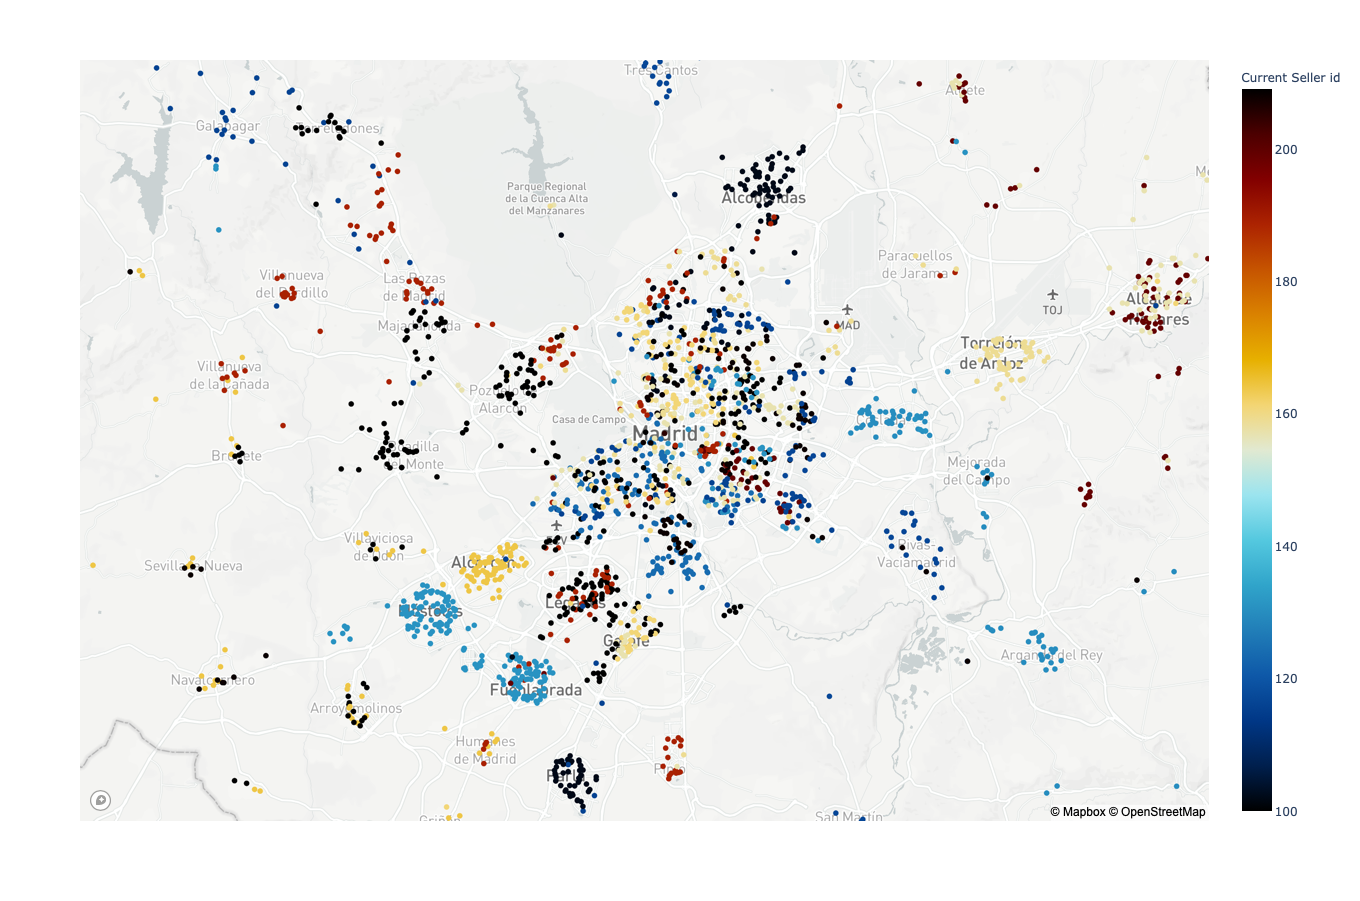

In [66]:
fig = px.scatter_mapbox(data_frame = mad, lat = 'Latitude', lon = 'Longitude',
               labels = 'Institution', color_continuous_scale = px.colors.cyclical.IceFire, 
                size_max = 20, zoom = 10, color = 'Current Seller id').show()

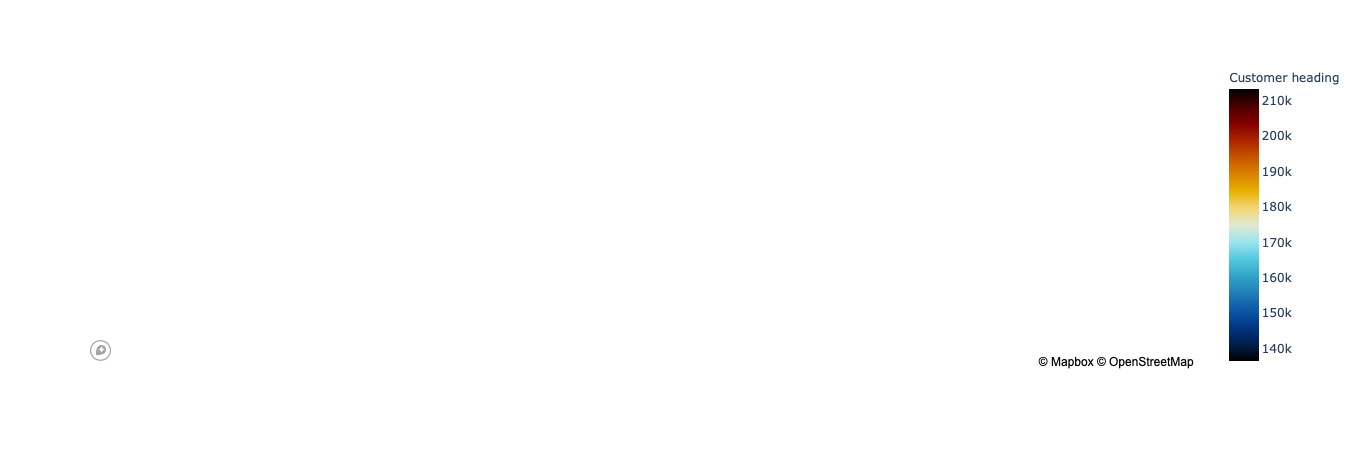

In [54]:
fig = px.scatter_mapbox(data_frame = mad, lat = 'Latitude', lon = 'Longitude',
               labels = 'Institution', color_continuous_scale = px.colors.cyclical.IceFire, size_max = 20, zoom = 10, color = 'Customer heading').show()

In [17]:
school_locations.columns

Index(['Customer heading', 'Latitude', 'Longitude', 'Town', 'Province',
       'Region', 'Current Seller id', 'Institution', 'Titularity'],
      dtype='object')

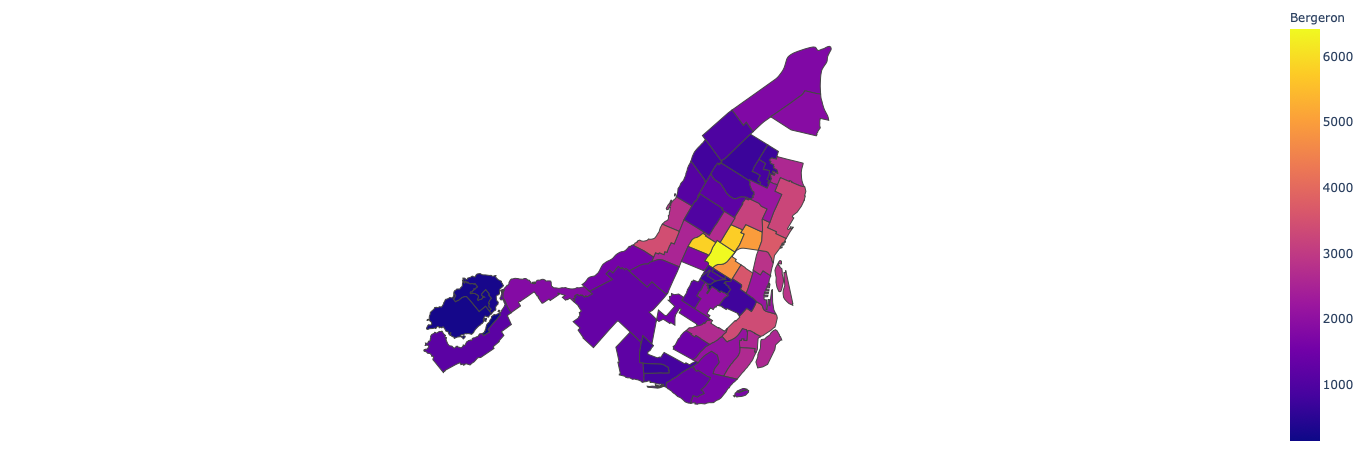

In [86]:
df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth(df, geojson=geojson, color="Bergeron",
                    locations="district", featureidkey="properties.district",
                    projection="mercator"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

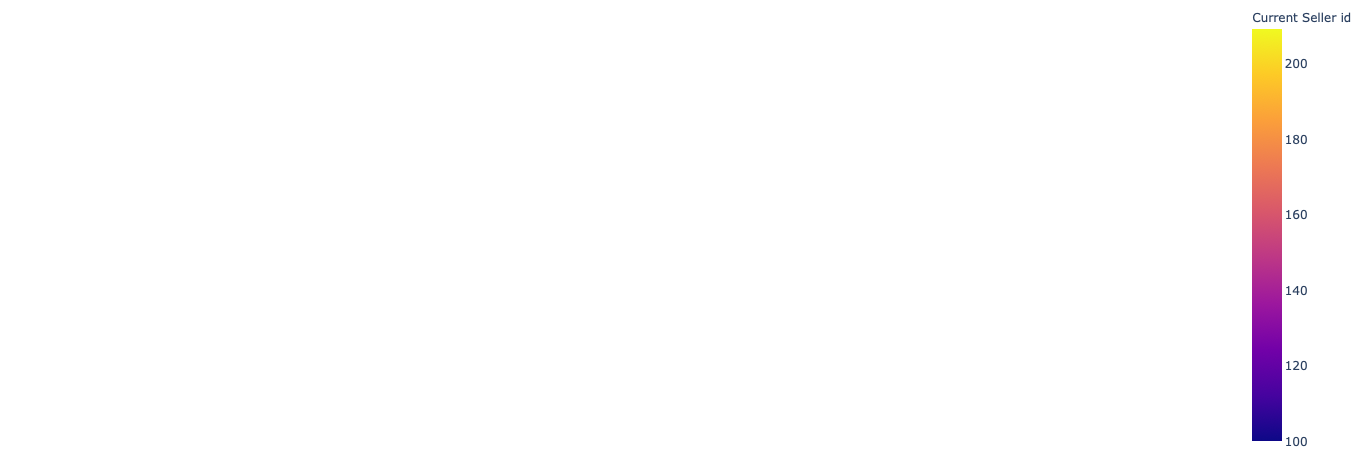

In [91]:
df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth(mad, geojson=geojson, color="Current Seller id",
                    locations="Province", featureidkey="properties.province",
                    projection="mercator"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [85]:
df.head()

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112


# STEP 2 - DATA EXPLORATION

# STEP 3 - CONCLUSIONS